# Capstone I Preliminary EDA
7/15/2020

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

In [162]:
df = pd.read_csv('../data/processed/EdStatsAggregated.csv')

In [163]:
df.head(2)

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1978,1979,1980,1981,1982,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,United States,USA,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,NaN,NaN,NaN,NaN,NaN,...,31.982700,33.147579,33.628712,33.561531,32.421581,31.586950,30.963221,31.109060,28.698191,NaN
1,1,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,10587.285756,11695.55442,12597.66751,13993.166744,14438.976276,...,46437.067117,48061.537661,48401.427340,47001.555350,48373.878816,49790.665478,51450.122295,52787.026949,54598.550689,56469.008969


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      36 non-null     int64  
 1   Country Name    36 non-null     object 
 2   Country Code    36 non-null     object 
 3   Indicator Name  36 non-null     object 
 4   Indicator Code  36 non-null     object 
 5   1978            10 non-null     float64
 6   1979            12 non-null     float64
 7   1980            14 non-null     float64
 8   1981            13 non-null     float64
 9   1982            12 non-null     float64
 10  1983            12 non-null     float64
 11  1984            15 non-null     float64
 12  1985            15 non-null     float64
 13  1986            17 non-null     float64
 14  1987            15 non-null     float64
 15  1988            17 non-null     float64
 16  1989            17 non-null     float64
 17  1990            18 non-null     float

In [165]:
df.shape

(36, 43)

In [166]:
# df = df.dropna(axis=1)
# df.shape

In [167]:
df = df.drop(['Unnamed: 0', 'Country Name'], axis=1)

In [168]:
df.head(1)

,Country Code,Indicator Name,Indicator Code,1978,1979,1980,1981,1982,1983,1984,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,USA,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.9827,33.147579,33.628712,33.561531,32.421581,31.58695,30.963221,31.10906,28.698191,NaN


In [170]:
gdps = df[df['Indicator Code'] == 'NY.GDP.PCAP.CD']

In [172]:
primary_spend = df[df['Indicator Code'] == 'SE.XPD.PRIM.ZS']
primary_spend = primary_spend.dropna(axis=1)
primary_spend.head()

,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,2013,2014
0,USA,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,31.98270,33.147579,33.628712,33.561531,32.421581,31.586950,31.109060,28.698191
6,SWE,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,24.90185,25.046600,24.609659,24.074690,24.286600,24.259411,22.379950,22.780190
12,AUS,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,34.96822,35.141151,35.423229,35.963299,36.807030,35.971642,32.818642,32.625420
18,DEU,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,14.73804,14.023630,13.497080,13.549030,13.482980,13.211040,12.784330,12.793400
24,CHE,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,29.23546,29.386419,25.301100,27.927629,27.969919,28.911150,29.696461,29.575480


In [139]:
gdps = gdps.drop(['Indicator Name', 'Indicator Code'], axis=1)

In [143]:
gdps = gdps.dropna(axis=1)
gdps.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Code,,,,,,,,,,,,,,,,,,,,,
USA,12597.667510,13993.166744,14438.976276,15561.426396,17134.286017,18269.422168,19115.052908,20100.858892,21483.233060,22922.437090,...,46437.067117,48061.537661,48401.427340,47001.555350,48373.878816,49790.665478,51450.122295,52787.026949,54598.550689,56469.008969
SWE,16856.761086,15366.668591,13545.259119,12430.458931,12914.330682,13474.161346,17727.495334,21485.293869,24188.765945,25300.395116,...,46256.471601,53324.379372,55746.842381,46207.059203,52076.255913,59593.287112,57134.077068,60283.245223,59180.198978,50812.190860
AUS,10201.978300,11844.632539,12778.662567,11528.168100,12448.783725,11452.656888,11379.523369,11643.947183,14283.384446,17838.363120,...,36118.283813,40991.982886,49664.685043,42742.998981,51874.080482,62245.100292,67677.634766,67792.303862,62214.609121,56554.038761
DEU,12092.381854,10170.446275,9876.228232,9827.022409,9277.932299,9393.891691,13410.897100,16614.410104,17863.437897,17697.163514,...,36447.872318,41814.819097,45699.198323,41732.707253,41785.556913,46810.327959,44065.248908,46530.911428,48042.563435,41323.921502
CHE,18832.196719,17153.401316,17478.655793,17341.994876,16499.146931,16655.337392,23751.449517,29558.895478,31743.652912,30401.892481,...,57579.501954,63555.237500,72487.845930,69927.468770,74605.721021,88415.628061,83538.230078,85112.464398,86605.563376,82016.021313


In [149]:
# gdps.set_index('Country Code', inplace=True)
g = gdps.T
g.describe()

Country Code,USA,SWE,AUS,DEU,CHE,GBR
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,33413.086505,33862.214627,28106.744464,27782.932614,46432.411439,27069.540320
std,13322.622556,14890.290372,17857.492773,12173.586950,22017.273623,13358.261824
min,12597.667510,12430.458931,10201.978300,9277.932299,16499.146931,8179.194441
25%,22562.636082,24161.799376,16831.706266,17821.869301,31408.212804,16176.253666
50%,32260.943997,30152.971615,20473.073036,26920.855130,40978.850518,27024.533781
75%,46578.189175,46219.412303,37336.708581,37666.884614,59073.435840,40341.075816
max,56469.008969,60283.245223,67792.303862,48042.563435,88415.628061,50134.316097


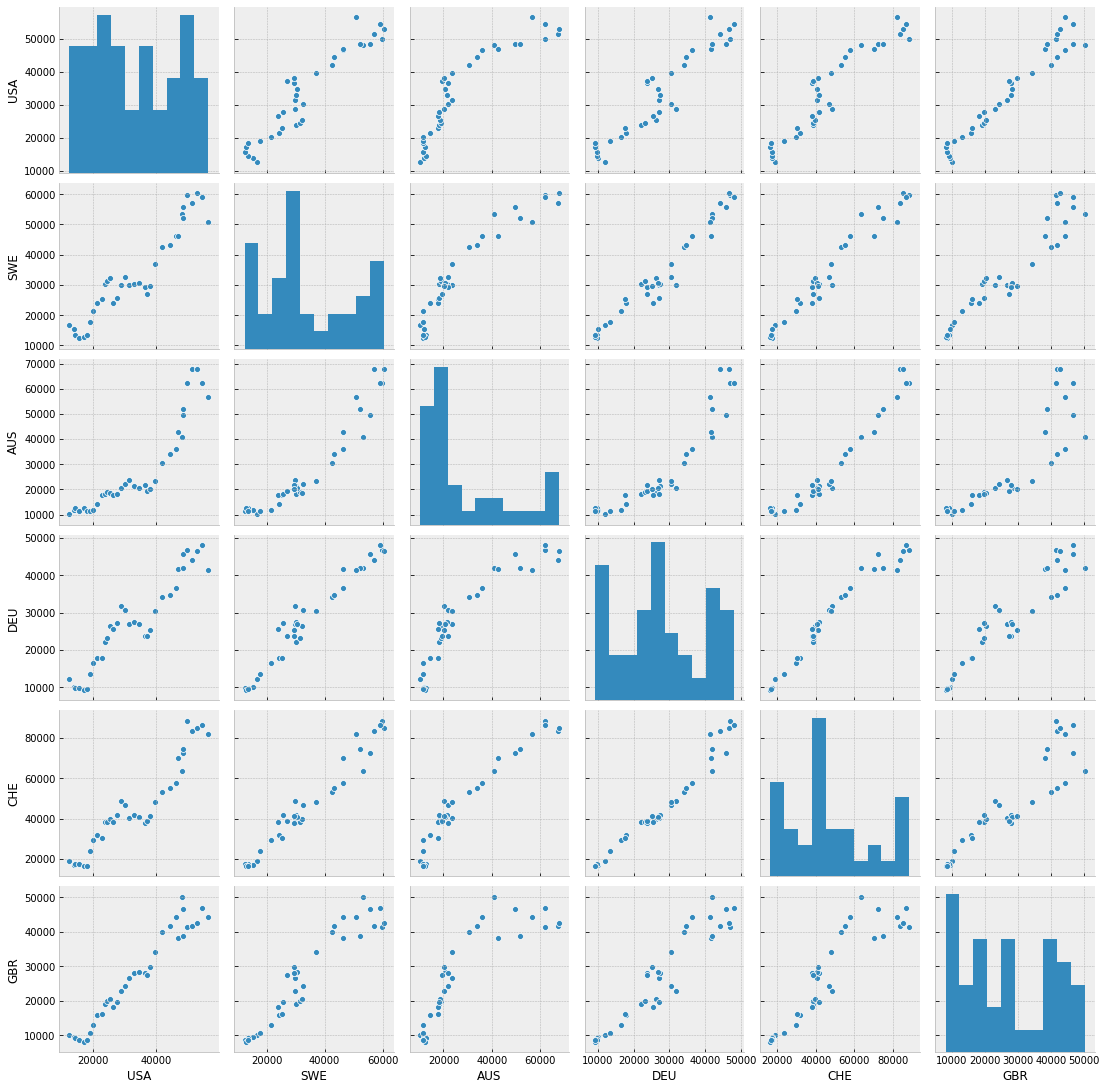

In [146]:
sns.pairplot(g)

In [147]:
g.corr(method='pearson')

Country Code,USA,SWE,AUS,DEU,CHE,GBR
Country Code,,,,,,
USA,1.000000,0.946167,0.901680,0.948776,0.945838,0.975368
SWE,0.946167,1.000000,0.946702,0.976855,0.978788,0.949264
AUS,0.901680,0.946702,1.000000,0.909664,0.962847,0.857645
DEU,0.948776,0.976855,0.909664,1.000000,0.979112,0.946594
CHE,0.945838,0.978788,0.962847,0.979112,1.000000,0.913579
GBR,0.975368,0.949264,0.857645,0.946594,0.913579,1.000000


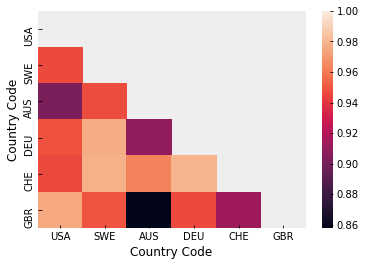

In [148]:
mask = np.triu(np.ones_like(g.corr()))
sns.heatmap(g.corr(), mask=mask)